In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [4]:
path='ferreteria.csv'
all_variables=['Cantidad','Existencia','Modelo','Pedido']
features=['Cantidad','Existencia','Modelo','Pedido']
target=['Cantidad']
df= pd.read_csv(path,names=all_variables)
df.head()

,Cantidad,Existencia,Modelo,Pedido
0,14,1,222631,1
1,11,0,342760,1
2,12,0,707298,3
3,17,0,363204,6
4,13,1,639987,5


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),columns=features)
df_sc.head()

/home/karisauria/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Cantidad,Existencia,Modelo,Pedido
0,0.333333,1.0,0.094211,0.0
1,0.083333,0.0,0.235158,0.0
2,0.166667,0.0,0.662869,0.4
3,0.583333,0.0,0.259145,1.0
4,0.250000,1.0,0.583894,0.8


In [6]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),columns=features)
df_pca.head()

,Cantidad,Existencia,Modelo,Pedido
0,357123.967743,-0.170987,2.862504,0.274832
1,236994.967752,-3.541780,2.875930,-0.609934
2,-127543.032248,-3.690751,0.691584,-0.338880
3,216550.967737,2.182453,-2.376155,-0.380440
4,-60232.032250,-2.555503,-1.249998,0.747391


In [7]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.00000000e+00, 2.11397325e-10, 4.16677245e-11, 3.41933881e-12])

In [8]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','target']
df_pca.head()

,PC1,PC2,PC3,PC4,target
0,357123.967743,-0.170987,2.862504,0.274832,14
1,236994.967752,-3.541780,2.875930,-0.609934,11
2,-127543.032248,-3.690751,0.691584,-0.338880,12
3,216550.967737,2.182453,-2.376155,-0.380440,17
4,-60232.032250,-2.555503,-1.249998,0.747391,13


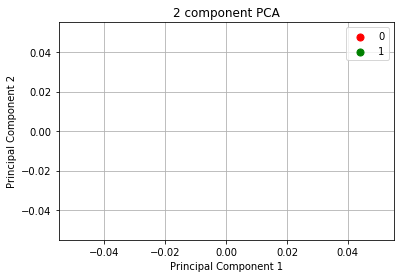

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [0, 1]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

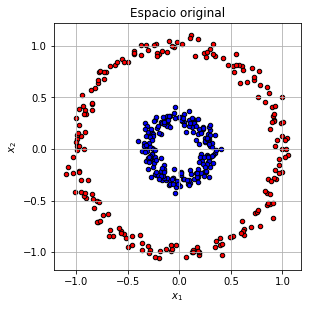

In [11]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

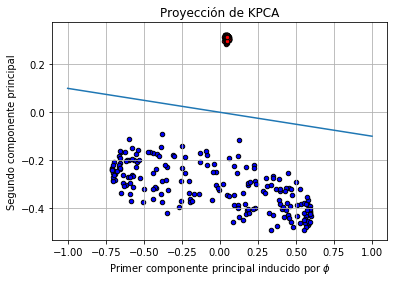

In [12]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()